# Should We Play Tennis?

In [1]:
import pandas as pd
import os

data_file = "Tennis.csv"
data = pd.read_csv(data_file)
(nrows, ncols) = data.shape

In [2]:
# Tools for viewing the data
#print(data.info())          # gives the structure of the data (rows/cols)
#print(data.head())          # shows the top five data entries
#print(data.describe())      # gives the statistics on the data in the DF

### Convert string features to integers

In [3]:
colnames = list(data.columns.values)
string_encoding = {}
data_encoded = data.copy()
for i in range(ncols):
    levels = list(set(data.iloc[:, i]))
    num_levels = len(levels)
    string_encoding_i = dict(zip(levels, range(num_levels)))
    string_encoding[colnames[i]] = string_encoding_i
    for j in range(nrows):
        data_encoded.iloc[j, i] = string_encoding_i[data.iloc[j, i]]

print(string_encoding)
print(data_encoded.head())

{'outlook': {'sunny': 0, 'overcast': 1, 'rain': 2}, 'temp': {'mild': 0, 'cool': 1, 'hot': 2}, 'humidity': {'normal': 0, 'high': 1}, 'windy': {'weak': 0, 'strong': 1}, 'play': {'no': 0, 'yes': 1}}
   outlook  temp  humidity  windy  play
0        0     2         1      1     0
1        0     2         1      0     0
2        1     2         1      0     1
3        2     0         1      0     1
4        2     1         0      0     1


### One Hot Encoding Categorial Variables

In [4]:
from sklearn import preprocessing
enc = preprocessing.OneHotEncoder()
enc.fit(data_encoded.iloc[:,0:4])
data_onehotencoded = enc.transform(data_encoded.iloc[:,0:4])
feature_names = ["outlook_rainy", "outlook_overcast", "outlook_sunny", \
                 "temp_mild", "temp_hot", "temp_cool", \
                 "humidity_normal", "humidity_high", \
                 "windy_false", "windy_true"]

### Assign the X (feature) and Y (class) Arrays and Split into Train and Test Data

In [5]:
from sklearn import tree
import numpy as np
from sklearn.model_selection import train_test_split 

# Ensure the decision tree is deterministic
np.random.seed(101)

X = data_onehotencoded.toarray()
Y = np.asarray(data_encoded.iloc[:,-1], dtype="int")
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.1, random_state = 99)
print(y_test)

[0 1]


### Generate and Evaluate the Model

In [6]:
# Generate the Classification model
from sklearn.tree import DecisionTreeClassifier
dec_tree_ent = DecisionTreeClassifier(criterion='entropy', max_depth=3)
model = dec_tree_ent.fit(X_train,y_train)

# Validate the model
y_predict_ent = model.predict(X_test)

In [7]:
# Generate the accuracy score
from sklearn.metrics import accuracy_score

#def measure_performance(X_train, y_train)
acc_ent = accuracy_score(y_test, y_predict_ent) * 100
print("Accuracy is : {}%".format(acc_ent))

Accuracy is : 100.0%


### Create a Confusion Matrix

In [8]:
from sklearn.metrics import confusion_matrix

pd.DataFrame(
    confusion_matrix(y_test, y_predict_ent),
    columns=['Predicted Don\'t Play', 'Predicted Play'],
    index=['True Don\'t play', 'True Play']
)

,Predicted Don't Play,Predicted Play
True Don't play,1,0
True Play,0,1


### Test Other Split Criterion

In [9]:
# Use Gini impurity (default) instead of Information Gain (entropy)
dec_tree_gini = DecisionTreeClassifier().fit(X_train,y_train)  
# Validate the model
y_predict_gini = dec_tree_gini.predict(X_test)

# Generate the accuracy score
acc_gini = accuracy_score(y_test, y_predict_gini) * 100
print("Accuracy is : {}%".format(acc_gini))

Accuracy is : 100.0%


### Visualize the Decision Tree

In [10]:
from sklearn import tree
import matplotlib.pyplot as plt

#This code differs from the video where it is using graphviz for visualizing the trees. Instead we will use plot_tree method
#from Sklean instead for it's simplicity.
fig = plt.figure(figsize=(25,20)) 
tree.plot_tree(dec_tree_ent,
                   feature_names=feature_names,  
                   class_names=feature_names,
                   filled=True)


[Text(1210.9375, 1347.5, 'outlook_overcast <= 0.5\nentropy = 0.918\nsamples = 12\nvalue = [4, 8]\nclass = outlook_overcast'),
 Text(968.75, 962.5, 'humidity_normal <= 0.5\nentropy = 0.991\nsamples = 9\nvalue = [4, 5]\nclass = outlook_overcast'),
 Text(484.375, 577.5, 'outlook_rainy <= 0.5\nentropy = 0.811\nsamples = 4\nvalue = [3, 1]\nclass = outlook_rainy'),
 Text(242.1875, 192.5, 'entropy = 1.0\nsamples = 2\nvalue = [1, 1]\nclass = outlook_rainy'),
 Text(726.5625, 192.5, 'entropy = 0.0\nsamples = 2\nvalue = [2, 0]\nclass = outlook_rainy'),
 Text(1453.125, 577.5, 'windy_true <= 0.5\nentropy = 0.722\nsamples = 5\nvalue = [1, 4]\nclass = outlook_overcast'),
 Text(1210.9375, 192.5, 'entropy = 0.0\nsamples = 3\nvalue = [0, 3]\nclass = outlook_overcast'),
 Text(1695.3125, 192.5, 'entropy = 1.0\nsamples = 2\nvalue = [1, 1]\nclass = outlook_rainy'),
 Text(1453.125, 962.5, 'entropy = 0.0\nsamples = 3\nvalue = [0, 3]\nclass = outlook_overcast')]

[Text(930.0, 978.48, 'outlook_overcast <= 0.5\ngini = 0.444\nsamples = 12\nvalue = [4, 8]\nclass = outlook_overcast'),
 Text(775.0, 761.0400000000001, 'humidity_high <= 0.5\ngini = 0.494\nsamples = 9\nvalue = [4, 5]\nclass = outlook_overcast'),
 Text(465.0, 543.6, 'windy_false <= 0.5\ngini = 0.32\nsamples = 5\nvalue = [1, 4]\nclass = outlook_overcast'),
 Text(310.0, 326.1600000000001, 'temp_hot <= 0.5\ngini = 0.5\nsamples = 2\nvalue = [1, 1]\nclass = outlook_rainy'),
 Text(155.0, 108.72000000000003, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]\nclass = outlook_overcast'),
 Text(465.0, 108.72000000000003, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]\nclass = outlook_rainy'),
 Text(620.0, 326.1600000000001, 'gini = 0.0\nsamples = 3\nvalue = [0, 3]\nclass = outlook_overcast'),
 Text(1085.0, 543.6, 'outlook_rainy <= 0.5\ngini = 0.375\nsamples = 4\nvalue = [3, 1]\nclass = outlook_rainy'),
 Text(930.0, 326.1600000000001, 'windy_true <= 0.5\ngini = 0.5\nsamples = 2\nvalue = [1, 1]\nclass = outlook_ra

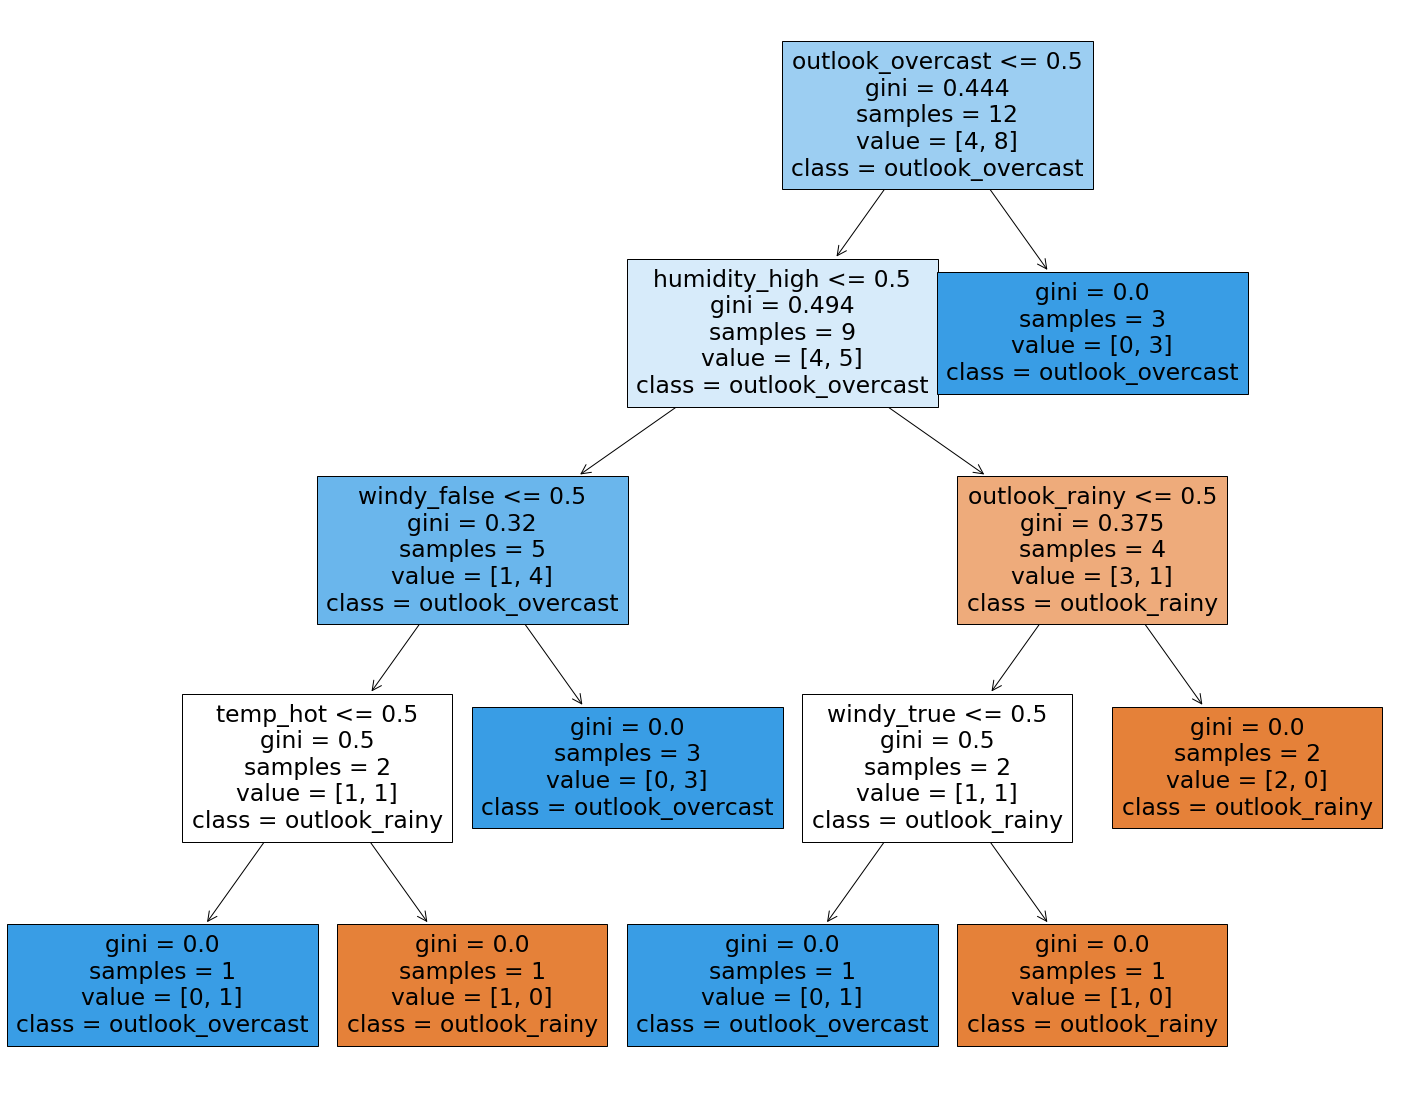

In [11]:
fig = plt.figure(figsize=(25,20)) 
tree.plot_tree(dec_tree_gini,
                   feature_names=feature_names,  
                   class_names=feature_names,
                   filled=True)

## What if I didn't have a "test set"? 
What would the tree look like if rather than generating an accuracy score for evaluation purposes, I just let it build the tree and see what happens. 

What do you think might occur?

In this case I'm just loading up the raw data, X and Y.

[Text(837.0, 978.48, 'outlook_overcast <= 0.5\nentropy = 0.94\nsamples = 14\nvalue = [5, 9]\nclass = outlook_overcast'),
 Text(697.5, 761.0400000000001, 'humidity_high <= 0.5\nentropy = 1.0\nsamples = 10\nvalue = [5, 5]\nclass = outlook_rainy'),
 Text(418.5, 543.6, 'windy_false <= 0.5\nentropy = 0.722\nsamples = 5\nvalue = [1, 4]\nclass = outlook_overcast'),
 Text(279.0, 326.1600000000001, 'outlook_rainy <= 0.5\nentropy = 1.0\nsamples = 2\nvalue = [1, 1]\nclass = outlook_rainy'),
 Text(139.5, 108.72000000000003, 'entropy = 0.0\nsamples = 1\nvalue = [1, 0]\nclass = outlook_rainy'),
 Text(418.5, 108.72000000000003, 'entropy = 0.0\nsamples = 1\nvalue = [0, 1]\nclass = outlook_overcast'),
 Text(558.0, 326.1600000000001, 'entropy = 0.0\nsamples = 3\nvalue = [0, 3]\nclass = outlook_overcast'),
 Text(976.5, 543.6, 'outlook_sunny <= 0.5\nentropy = 0.722\nsamples = 5\nvalue = [4, 1]\nclass = outlook_rainy'),
 Text(837.0, 326.1600000000001, 'entropy = 0.0\nsamples = 3\nvalue = [3, 0]\nclass = ou

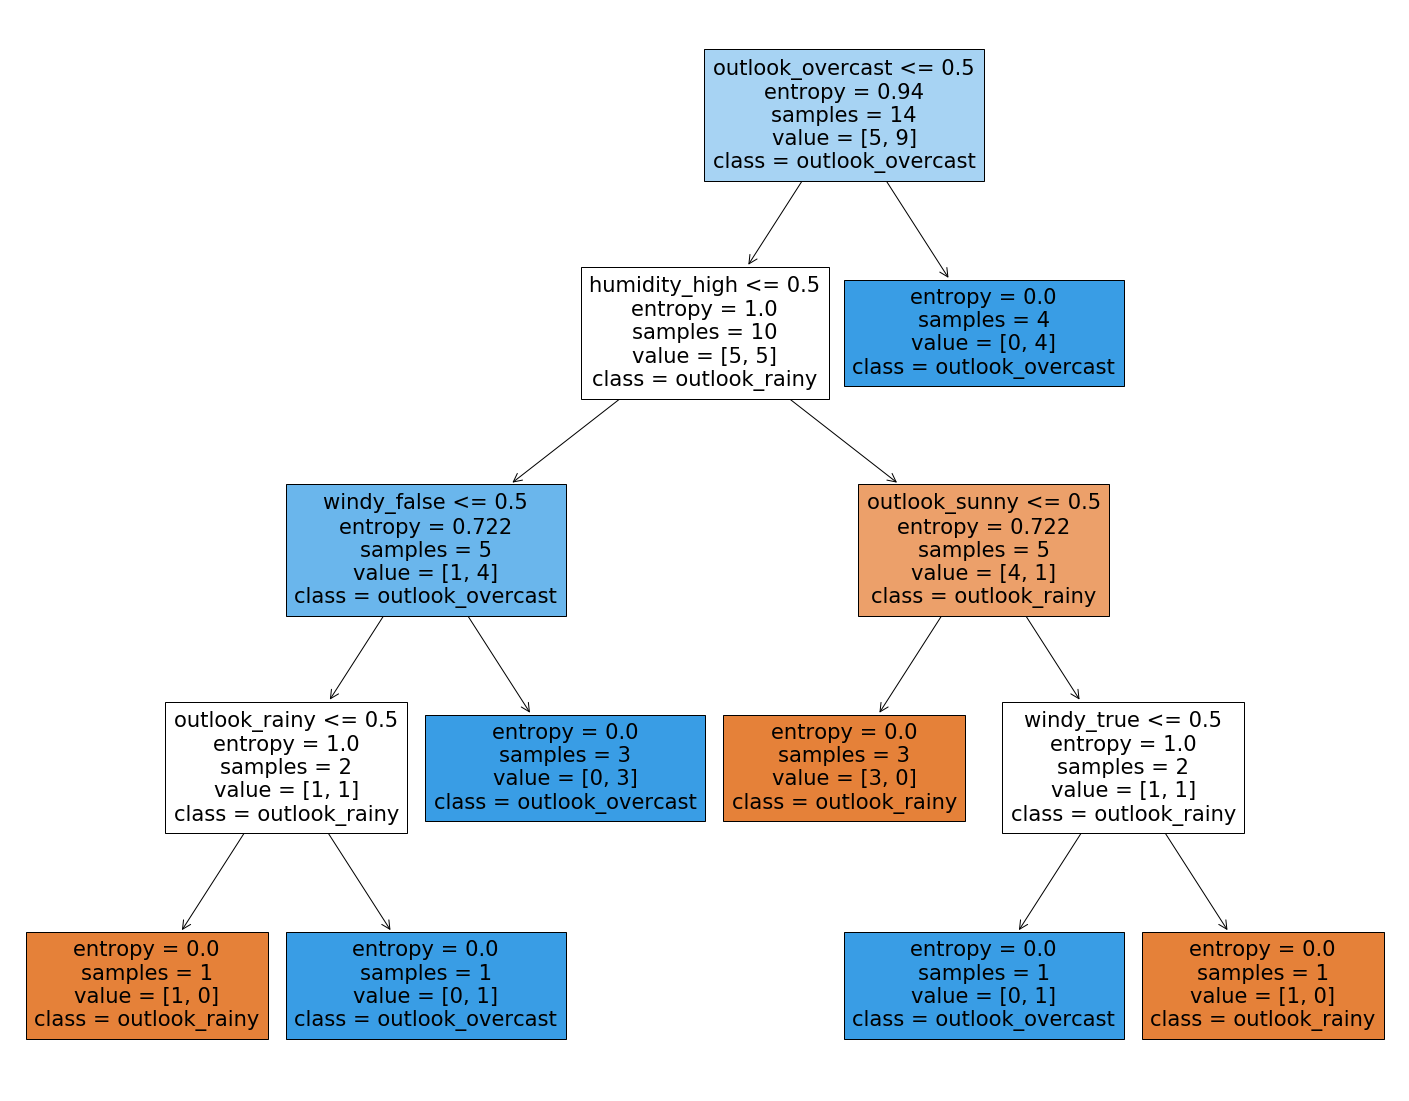

In [12]:
dec_tree_ent_new = DecisionTreeClassifier(criterion='entropy').fit(X,Y)  
fig = plt.figure(figsize=(25,20)) 
tree.plot_tree(dec_tree_ent_new,
                   feature_names=feature_names,  
                   class_names=feature_names,
                   filled=True)

### Add a new 'noisy' row and test for overfitting

Now I'm going to create a new row to testset without retraining the existing models to see how they do. 

In [13]:
print(X_test)
print(y_test)
numY = len(y_test)
print(numY)

[[1. 0. 0. 0. 0. 1. 0. 1. 0. 1.]
 [0. 1. 0. 0. 0. 1. 1. 0. 1. 0.]]
[0 1]
2


In [14]:
# Add Outlook=Sunny, temp=Hot, humidity=Normal, Windy=Strong, Play=no
new_X = np.array([1., 0., 0., 0., 0., 1., 1., 0., 0., 1.])
new_y = 1

X_test = np.vstack([X_test, new_X])
y_test = np.hstack([y_test, new_y])

In [15]:
#print(X_test)
#print(y_test)
#numY = len(y_test)
#print(numY)

In [16]:
## Put the noisy test through the two models
y_predict_ent2 = dec_tree_ent.predict(X_test)
y_predict_gini2 = dec_tree_gini.predict(X_test)

# Generate the accuracy score
acc_ent2 = accuracy_score(y_test, y_predict_ent2) * 100
print("Accuracy is : {}%".format(acc_ent2))

# Generate the accuracy score
acc_gini2 = accuracy_score(y_test, y_predict_gini2) * 100
print("Accuracy is : {}%".format(acc_gini2))

Accuracy is : 66.66666666666666%
Accuracy is : 100.0%


In [17]:
pd.DataFrame(
    confusion_matrix(y_test, y_predict_ent2),
    columns=['Predicted Don\'t Play', 'Predicted Play'],
    index=['True Don\'t play', 'True Play']
)

,Predicted Don't Play,Predicted Play
True Don't play,1,0
True Play,1,1


In [18]:
pd.DataFrame(
    confusion_matrix(y_test, y_predict_gini2),
    columns=['Predicted Don\'t Play', 'Predicted Play'],
    index=['True Don\'t play', 'True Play']
)

,Predicted Don't Play,Predicted Play
True Don't play,1,0
True Play,0,2
